In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from skimage.transform import resize
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib import image
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2


In [27]:
import os
os.chdir(r"C:\Users\Kristin\Desktop\Thinkful\Capstone4")

In [28]:
# path the dataset and annotation
acne_folder = r"C:\Users\Kristin\Desktop\Thinkful\Capstone4\Acne_data"
annotated_file = r"C:\Users\Kristin\Desktop\Thinkful\Capstone4\annotated_image.ndjson"

In [29]:
import json
# 
annotations = []
# initialize lists to store image path and corresponding labels
with open(annotated_file, "r") as f:
    for line in f:
        annotation = json.loads(line)
        annotations.append(annotation)

Scoring system in acne vulgaris
mild = 0-5
moderate = 6-20
severe = 21-50
very severe = 50+
reference: https://ijdvl.com/scoring-systems-in-acne-vulgaris/#:~:text=They%20classified%20acne%20based%20on,the%20%5BTable%20%2D%204%5D.

In [30]:
# map acne severity classification to image path
acne_score =[]
image_paths = []

for annotation in annotations:
    image_file = annotation['data_row']['external_id']
    acne_count = len(annotation['projects']['cljymaou702cy07x50qtqdxzw']['labels'][0]['annotations']['objects'])
    # construct image path
    image_path = os.path.join(acne_folder, image_file)
    image_paths.append(image_path)
    
    if acne_count <= 5:
        severity = 1 #mild
    elif 6 <= acne_count <=20:
        severity = 2 # moderate
    elif 21 <= acne_count <= 50:
        severity = 3 # severe
    else:
        severity = 4
    acne_score.append(severity)
    

In [31]:
# load all images in a directory
loaded_images = list()
for path in image_paths:
  # load image as numpy array
  img_data = image.imread(path)
  # resize image to 200 x 200
  resized_img = resize(img_data, (200,200))
  # store loaded image
  loaded_images.append(resized_img)
  print('> loaded %s %s' % (path, img_data.shape))

> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\Acne_data\acne-face-1-10__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg (222, 294, 3)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\Acne_data\acne-face-1-50__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg (222, 294, 3)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\Acne_data\acne-face-1-51__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg (222, 294, 3)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\Acne_data\acne-face-1-53__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg (222, 294, 3)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\Acne_data\acne-face-3-2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDE4XQ.jpg (222, 294, 3)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\Acne_data\acne-face-3-3__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg (222, 294, 3)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\Acne_data\acne-face-4-12__ProtectWyJQcm90ZWN0Il

In [32]:
# Create a dictionary with image path, scores and pixel data
import pandas as pd
data = {
    'Image_Path': image_paths,
    'Image_Pixels': loaded_images,
    'Acne_Scores': acne_score
}

# create a dataframe from the dictionary
df = pd.DataFrame(data)

In [33]:
df['Image_Pixels'][0].shape

(200, 200, 3)

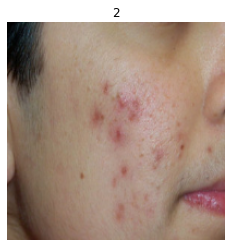

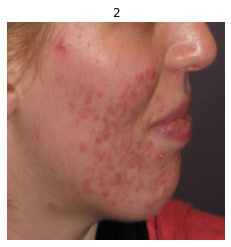

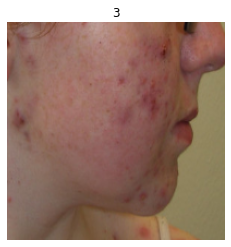

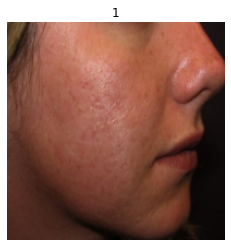

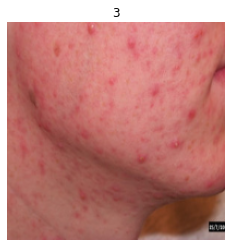

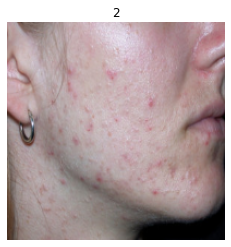

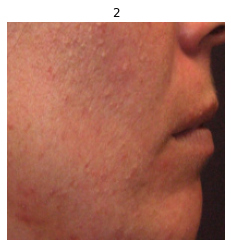

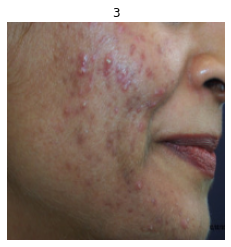

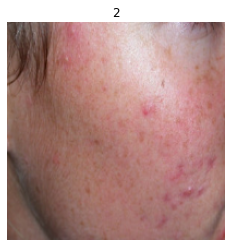

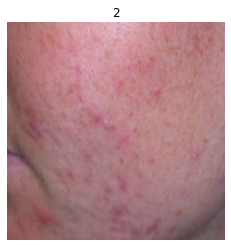

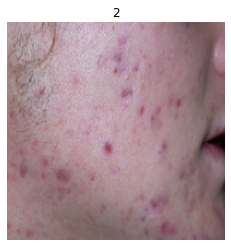

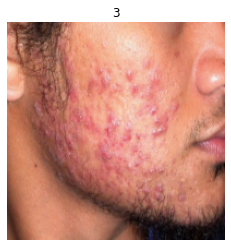

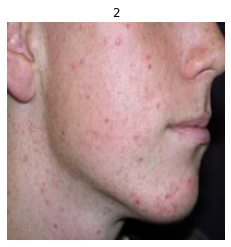

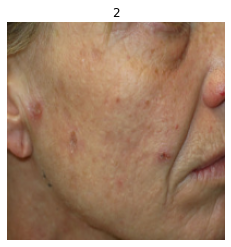

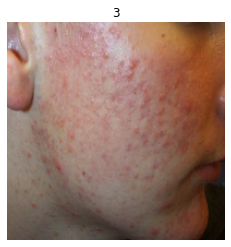

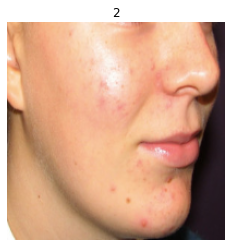

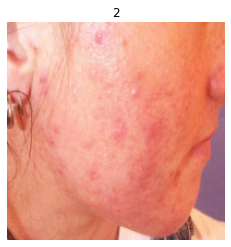

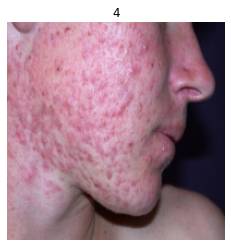

In [34]:
for _,row in df.iterrows():
    pixel_data = row['Image_Pixels']
    # display the image using pixel data
    plt.imshow(pixel_data)
    plt.axis('off')
    plt.title(row['Acne_Scores'])
    plt.show()

Make the training and test datasets

In [72]:
df['Acne_Scores']-1

0     1
1     1
2     2
3     0
4     2
5     1
6     1
7     2
8     1
9     1
10    1
11    2
12    1
13    1
14    2
15    1
16    1
17    3
Name: Acne_Scores, dtype: int64

In [73]:
# use one hot encoding for the image categories (mild, moderate, severe, very severe)
number_of_classes = 4
from tensorflow.keras.utils import to_categorical
Y = to_categorical(df['Acne_Scores']-1, number_of_classes)

In [104]:
df['Image_Pixels'].dtype

dtype('O')

In [105]:
# put 'Image_pixels', which is a Series to a numpy array so that it is compatible with the algorithm
X_train = np.array(df['Image_Pixels'][:14].tolist())
X_train = X_train.reshape(-1,200,200,3)
X_test = np.array(df['Image_Pixels'][14:].tolist())
X_test = X_test.reshape(-1,200,200,3)
Y_train = Y[:14]
Y_test = Y[14:]

Build a simple artificial neural network for image classification

In [95]:
ann= Sequential()
ann.add(Flatten(input_shape=(200,200,3))),
ann.add(Dense(32, activation='ReLU'))
ann.add(Dense(16, activation='ReLU'))
ann.add(Dense(4, activation='softmax'))

In [96]:
ann.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 120000)            0         
                                                                 
 dense_12 (Dense)            (None, 32)                3840032   
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 4)                 68        
                                                                 
Total params: 3,840,628
Trainable params: 3,840,628
Non-trainable params: 0
_________________________________________________________________


In [98]:
ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 578ms/step - loss: 1.1347 - accuracy: 0.6429
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 42.4525 - accuracy: 0.6429
Epoch 3/5
1/1 [==============================] - 0s 27ms/step - loss: 28.1490 - accuracy: 0.6429
Epoch 4/5
1/1 [==============================] - 0s 30ms/step - loss: 24.5155 - accuracy: 0.6429
Epoch 5/5
1/1 [==============================] - 0s 26ms/step - loss: 18.2949 - accuracy: 0.6429


In [107]:

score = ann.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 27.69434928894043
Test accuracy: 0.5


In [109]:
cnn= Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')

]

)
cnn.add(Flatten(input_shape=(200,200,3))),

cnn.add(Dense(64, activation='ReLU'))
cnn.add(Dense(4, activation='softmax'))

In [110]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
cnn.fit(X_train, Y_train, batch_size = 1, epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 65ms/step - loss: 0.9341 - accuracy: 0.6429
Epoch 2/10
14/14 [==============================] - 1s 64ms/step - loss: 0.9153 - accuracy: 0.6429
Epoch 3/10
14/14 [==============================] - 1s 65ms/step - loss: 0.9062 - accuracy: 0.6429
Epoch 4/10
14/14 [==============================] - 1s 64ms/step - loss: 0.8971 - accuracy: 0.6429
Epoch 5/10
14/14 [==============================] - 1s 68ms/step - loss: 0.8869 - accuracy: 0.6429
Epoch 6/10
14/14 [==============================] - 1s 63ms/step - loss: 0.8834 - accuracy: 0.6429
Epoch 7/10
14/14 [==============================] - 1s 65ms/step - loss: 0.8780 - accuracy: 0.6429
Epoch 8/10
14/14 [==============================] - 1s 64ms/step - loss: 0.8722 - accuracy: 0.6429
Epoch 9/10
14/14 [==============================] - 1s 66ms/step - loss: 0.8716 - accuracy: 0.6429
Epoch 10/10
14/14 [==============================] - 1s 64ms/step - loss: 0.8658 - accuracy: 0.6429
